In [48]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A5/cs3220_A5_tasks/src' #@param {type: "string"}
sys.path.append(path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.

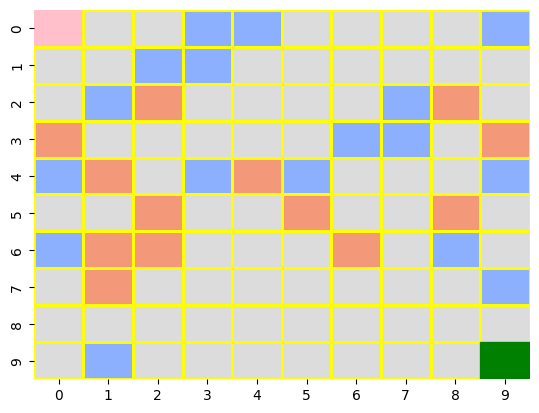

In [49]:
from mazeData import makeMaze
n=10
a=makeMaze(n)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()

draw_maze(a)


In [50]:
from mazeData import defineMazeAvailableActions
from mazeData import makeMazeTransformationModel
from mazeGraphClass import mazeGraph
from mazeProblemClass import MazeProblem
from mazeData import getFoodLocation
from nodeClass import Node
import math
from agentsPrograms import A_StarSearchAgentProgram
from agents import ProblemSolvingMazeAgentAStar

mazeAvailableActs=defineMazeAvailableActions(a)
maze=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph=mazeGraph(maze)
initState, goalState=(0,0),getFoodLocation(a)
mp1=MazeProblem(initState,goalState,mazeWorldGraph)
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))
f1=A_StarSearchAgentProgram(math.dist)
f1(mp1)


2.83
[(2.828, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(3.236, <Node (1, 0)>), (4.236000000000001, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 2
[(4.0, <Node (2, 0)>), (4.414, <Node (1, 1)>), (4.236000000000001, <Node (0, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 3
Nodes expanded: 3
[(4.236000000000001, <Node (0, 1)>), (4.414, <Node (1, 1)>), (5.236000000000001, <Node (3, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
Nodes expanded: 4
[(4.414, <Node (1, 1)>), (5.236000000000001, <Node (3, 0)>), (6.0, <Node (0, 2)>)]
The node (1, 1) is extracted from frontier:
Nodes expanded: 5
[(5.23600000

<Node (2, 2)>

In [51]:
AStar_MazeAgent1=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalState)
AStar_MazeAgent1.goal
print(AStar_MazeAgent1((0,2)))

[(2.0, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(4.236000000000001, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(4.414, <Node (1, 1)>), (6.827999999999999, <Node (0, 0)>)]
The node (1, 1) is extracted from frontier:
The child node <Node (1, 0)>.
Child node path cost: 5
Nodes expanded: 3
[(6.827999999999999, <Node (0, 0)>), (7.236000000000001, <Node (1, 0)>)]
The node (0, 0) is extracted from frontier:
Nodes expanded: 4
[(7.236000000000001, <Node (1, 0)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Child node path cost: 6
Nodes expanded: 5
[(8.0, <Node (2, 0)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 7
Nodes expanded: 6
[(9.236, <Node (3, 0)>)]
The node (3, 0) is extrac

In [52]:
goalStates=[goalState, (n-1,n-1)]
AStar_MazeAgent2=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
AStar_MazeAgent2.goal
AStar_MazeAgent2.run()

goal list: [(np.int64(2), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(2), np.int64(2))
[(2.828, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(3.236, <Node (1, 0)>), (4.236000000000001, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 2
[(4.0, <Node (2, 0)>), (4.414, <Node (1, 1)>), (4.236000000000001, <Node (0, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 3
Nodes expanded: 3
[(4.236000000000001, <Node (0, 1)>), (4.414, <Node (1, 1)>), (5.236000000000001, <Node (3, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
Nodes expanded: 4
[(4.414, <Node (1, 1)>), (5.236000000000001, <Nod

([['down', 'down', 'down', 'right', 'right', 'up'],
  ['down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right',
   'right',
   'right',
   'right',
   'right']],
 [[<Node (0, 0)>,
   <Node (1, 0)>,
   <Node (2, 0)>,
   <Node (3, 0)>,
   <Node (3, 1)>,
   <Node (3, 2)>,
   <Node (2, 2)>],
  [<Node (np.int64(2), np.int64(2))>,
   <Node (3, 2)>,
   <Node (4, 2)>,
   <Node (5, 2)>,
   <Node (6, 2)>,
   <Node (7, 2)>,
   <Node (8, 2)>,
   <Node (9, 2)>,
   <Node (9, 3)>,
   <Node (9, 4)>,
   <Node (9, 5)>,
   <Node (9, 6)>,
   <Node (9, 7)>,
   <Node (9, 8)>,
   <Node (9, 9)>]])

In [53]:
goalStates=[goalState, (n-1,n-1)]
AStar_MazeAgent3=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
a
s,p=AStar_MazeAgent3.run()

goal list: [(np.int64(2), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(2), np.int64(2))
[(2.828, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(3.236, <Node (1, 0)>), (4.236000000000001, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 2
[(4.0, <Node (2, 0)>), (4.414, <Node (1, 1)>), (4.236000000000001, <Node (0, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 3
Nodes expanded: 3
[(4.236000000000001, <Node (0, 1)>), (4.414, <Node (1, 1)>), (5.236000000000001, <Node (3, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
Nodes expanded: 4
[(4.414, <Node (1, 1)>), (5.236000000000001, <Nod

# 2.

In [54]:
from agents import ProblemSolvingMazeAgentAStar2

In [55]:
Manhat_MazeAgent1=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalState)
print(Manhat_MazeAgent1((0,2)))

[(np.int64(2), <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(np.int64(5), <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(np.int64(5), <Node (1, 1)>), (np.int64(8), <Node (0, 0)>)]
The node (1, 1) is extracted from frontier:
The child node <Node (1, 0)>.
Child node path cost: 5
Nodes expanded: 3
[(np.int64(8), <Node (0, 0)>), (np.int64(8), <Node (1, 0)>)]
The node (0, 0) is extracted from frontier:
Nodes expanded: 4
[(np.int64(8), <Node (1, 0)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Child node path cost: 6
Nodes expanded: 5
[(np.int64(8), <Node (2, 0)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 7
Nodes expanded: 6
[(np.int64(10), <Node (3, 0)>)]
The node (3, 0) is extract

In [56]:
goalStates=[goalState, (n-1,n-1)]
Manhat_MazeAgent2=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalStates)
Manhat_MazeAgent2.goal
Manhat_MazeAgent2.run()

goal list: [(np.int64(2), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(2), np.int64(2))
[(np.int64(4), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(4), <Node (1, 0)>), (np.int64(5), <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 2
[(np.int64(4), <Node (2, 0)>), (np.int64(5), <Node (1, 1)>), (np.int64(5), <Node (0, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 3
Nodes expanded: 3
[(np.int64(5), <Node (0, 1)>), (np.int64(5), <Node (1, 1)>), (np.int64(6), <Node (3, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
Nodes expanded: 4
[(np.int64(5), <Node (1, 1)>), (np.int64(

([['down', 'down', 'down', 'right', 'right', 'up'],
  ['down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right',
   'right',
   'right',
   'right',
   'right']],
 [[<Node (0, 0)>,
   <Node (1, 0)>,
   <Node (2, 0)>,
   <Node (3, 0)>,
   <Node (3, 1)>,
   <Node (3, 2)>,
   <Node (2, 2)>],
  [<Node (np.int64(2), np.int64(2))>,
   <Node (3, 2)>,
   <Node (4, 2)>,
   <Node (5, 2)>,
   <Node (6, 2)>,
   <Node (7, 2)>,
   <Node (8, 2)>,
   <Node (9, 2)>,
   <Node (9, 3)>,
   <Node (9, 4)>,
   <Node (9, 5)>,
   <Node (9, 6)>,
   <Node (9, 7)>,
   <Node (9, 8)>,
   <Node (9, 9)>]])

In [57]:
goalStates=[goalState, (n-1,n-1)]
Manhat_MazeAgent3=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalStates)
s2,p2=Manhat_MazeAgent3.run()

goal list: [(np.int64(2), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(2), np.int64(2))
[(np.int64(4), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(np.int64(4), <Node (1, 0)>), (np.int64(5), <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)>.
Child node path cost: 3
The child node <Node (2, 0)>.
Child node path cost: 2
Nodes expanded: 2
[(np.int64(4), <Node (2, 0)>), (np.int64(5), <Node (1, 1)>), (np.int64(5), <Node (0, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
Child node path cost: 3
Nodes expanded: 3
[(np.int64(5), <Node (0, 1)>), (np.int64(5), <Node (1, 1)>), (np.int64(6), <Node (3, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
Nodes expanded: 4
[(np.int64(5), <Node (1, 1)>), (np.int64(

In [59]:
p2

[[<Node (0, 0)>,
  <Node (1, 0)>,
  <Node (2, 0)>,
  <Node (3, 0)>,
  <Node (3, 1)>,
  <Node (3, 2)>,
  <Node (2, 2)>],
 [<Node (np.int64(2), np.int64(2))>,
  <Node (3, 2)>,
  <Node (4, 2)>,
  <Node (5, 2)>,
  <Node (6, 2)>,
  <Node (7, 2)>,
  <Node (8, 2)>,
  <Node (9, 2)>,
  <Node (9, 3)>,
  <Node (9, 4)>,
  <Node (9, 5)>,
  <Node (9, 6)>,
  <Node (9, 7)>,
  <Node (9, 8)>,
  <Node (9, 9)>]]

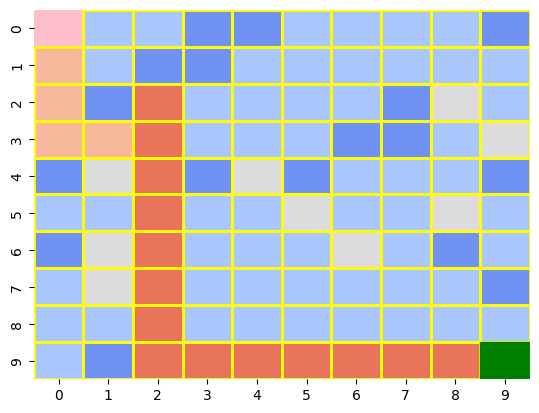

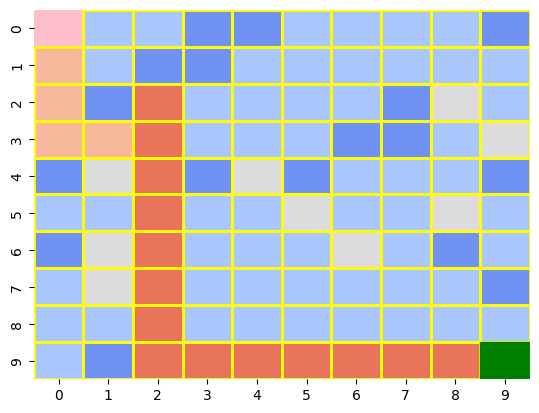

In [69]:
import copy

#Euclidean
resolvedMaze=copy.deepcopy(a)
i=3
for path in p:
  for node in path:
    resolvedMaze[node.state[0],node.state[1]]=i
  i+=1
draw_maze(resolvedMaze)

resolvedMaze2=copy.deepcopy(a)
i=3
for path2 in p2:
  for node2 in path2:
    resolvedMaze2[node2.state[0],node2.state[1] ]=i
  i+=1
draw_maze(resolvedMaze2)

# 3.